# Libraries 

In [2]:
import numpy as np
from numpy import arange
from numpy import meshgrid
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
# from OptimizationTestFunctions import Griewank # probably unnecessary library
from mpl_toolkits.mplot3d import Axes3D
#import sympy as sym # derivatie purpose

from scipy.stats import norm

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern

##### Derivative

In [ ]:
# Creating symbols
x, y = sym.symbols('x y')
# Derivative of function f
f = x**2/4000-sym.cos(x) + 1
f_prime = f.diff(x)
f_prime

# Gierwank Function

## 1-D Gierwank Function

In [ ]:
# First-order Griewank function
def first_gierwank(x):
    return x**2/4000-np.cos(x) + 1

x = np.linspace(-25, 25, 2000)
y = first_gierwank(x)
plt.plot(x, y)
plt.show()  

## 2-D Gierwank Function

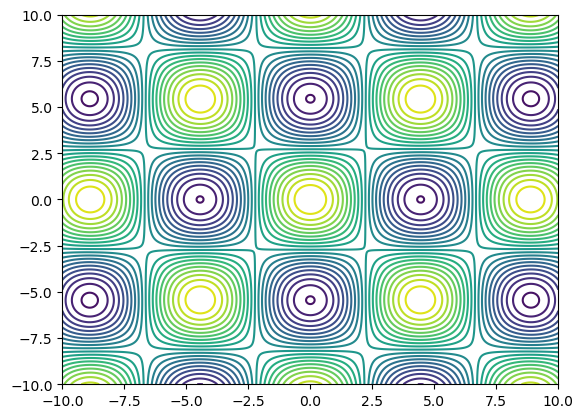

In [6]:
def f(x, y):
    return -((x**2 + y**2)/4000 - np.cos(x/np.sqrt(2)) * np.cos(y/np.sqrt(3)) + 1)

f = lambda x, y: -((x**2 + y**2)/4000 - np.cos(x/np.sqrt(2)) * np.cos(y/np.sqrt(3)) + 1)

v_func = np.vectorize(f) # to get array as output instead of scalar

x, y = np.meshgrid(np.linspace(-10, 10, 1000),
                   np.linspace(-10, 10, 1000))

fig, ax = plt.subplots(1)
ax.contour(x, y, v_func(x, y), levels=20)#, cmap=plt.cm.coolwarm)
plt.show()

## 3D Gierwank Function 

In [ ]:
# Second- order Gierwank function - Researchgate Equation
def sec_gierwank(x,y):
    return (x**2 + y**2)/4000 - np.cos(x/np.sqrt(2)) * np.cos(y/np.sqrt(3)) + 1
 
# define range for input
r_min, r_max =-10.0, 10.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.5)
yaxis = arange(r_min, r_max, 0.5)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = sec_gierwank(x, y)
# create a surface plot with the jet color scheme
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()   

## Bayesian Optimization

### Bayesian Optimization 1D function

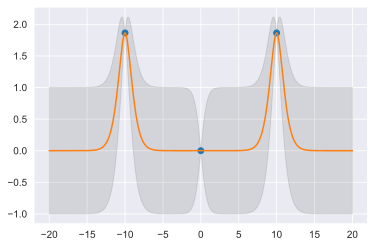

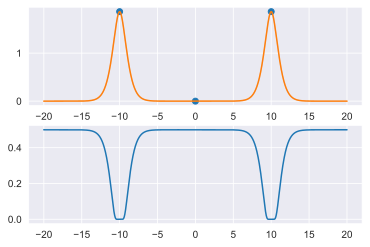

In [68]:
## Initial Chartr

# Linechart
X = np.linspace(-20, 20, 2000)
Y = first_gierwank(X)

# Randomly Selected Points
xstart = np.linspace(-10, 10, 3)
ystart = first_gierwank(xstart)
zstart = sec_gierwank(xstart, ystart)

## Creating model

model = GaussianProcessRegressor(kernel=Matern(nu=5/2))
# fit the model to the starting points
model.fit(xstart.reshape(-1, 1), ystart) #technical reshape because of sklearn's requirements
# predict values outside of the starting sample
p1 = model.predict(X.reshape(-1, 1), return_std=True) #technical reshape because of sklearn's requirements

#stdv
# traditional designation for the y values of the surrogate model
mu = p1[0]
# standard deviation of the estimates in the surrogate model
sigma = p1[1]

# First chart
plt.plot(xstart, ystart, 'o')
plt.plot(X, mu)
plt.fill_between(X, mu+sigma, mu-sigma, color="k", alpha=0.1)
plt.show()

gamma = ( np.min(ystart) - mu) / sigma
poi = norm.cdf(gamma)
poi[X == any(xstart)] = 0

# Second chart
fig, ax = plt.subplots(2)
ax[0].plot(xstart, ystart, 'o')
ax[0].plot(X, mu)
ax[0].fill_between(X, mu, mu, color="k", alpha=0.1)
ax[1].plot(X, poi)
plt.show()

In [72]:
fig, ax = plt.subplots(1,figsize=(11,7))  

ax.contour(x, y, v_func(x, y), levels=20)
plt.plot(xstart, ystart,'bo')

plt.show()

In [ ]:
poi[X == any(xstart)] = 0

In [ ]:
# Linechart
X = np.linspace(-10, 10, 2000)
Y = first_gierwank(X)

# Randomly Selected Points
xstart = np.linspace(-10, 10, 3)
ystart = first_gierwank(xstart)

## Creating model

model = GaussianProcessRegressor(kernel=Matern(nu=5/2))
# fit the model to the starting points

# Loop for first chart 
for i in range(0,20):
    model.fit(xstart.reshape(-1, 1), ystart)
    p2 = model.predict(X.reshape(-1, 1), return_std=True)
    # traditional designation for the y values of the surrogate model
    mu = p2[0]
    # standard deviation of the estimates in the surrogate model
    sigma = p2[1]
    # first chart
    plt.plot(xstart, ystart, 'o')
    plt.plot(X, mu)
    plt.fill_between(X, mu+sigma, mu-sigma, color="k", alpha=0.1)
    plt.title(f'Interation:{i}')
    plt.show()
    # new point
    gamma = ( np.min(ystart) - mu) / sigma
    poi = norm.cdf(gamma)
    poi[X == any(xstart)] = 0
    # New point
    xnext = X[np.argmax(poi)]
    print(xnext)
    # Appending new point 
    xstart = np.append(xstart, xnext)
    ystart = np.append(ystart, first_gierwank(xnext))
    zstart = np.append(zstart, sec_gierwank(xnext, ystart))

In [ ]:
ystart

In [ ]:
# Creating Z axis 
zstart = sec_gierwank(xstart, ystart)
for i in range(len(ystart)):
    zstart = np.append(zstart, sec_gierwank(xstart[i], ystart[i]))

In [ ]:
for i in range(len(ystart)):
    print(ystart[i])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import scipy.stats as st

np.random.seed(1)

# Quadratic 2d potential
def func(x):
    return np.sum(x**2/4000-np.cos(x) + 1, axis=-1)


# Grid
lim = 1
res = 50
lin = np.linspace(-lim, lim, res)

# x1.shape = (50, 50)
x1, x2 = np.meshgrid(lin, lin)
# xx.shape = (2500, 2)
xx = np.vstack((x1.flatten(), x2.flatten())).T

# Analytic function values
y_analytic = func(xx)
y_analytic = y_analytic.reshape(-1, res)

# Observed data
obs = 15
# X.shape = (15, 2)
X = np.stack(
        (np.random.choice(lin, obs), np.random.choice(lin, obs)),
        axis=-1
)
y_obs = func(X)

kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10)
gp.fit(X, y_obs)
print("Learned kernel", gp.kernel_)
# y_mean.shape = (2500, )
# y_cov.shape = (2500, 2500)
y_mean, y_cov = gp.predict(xx, return_cov=True)

posterior_nums = 3
posteriors = st.multivariate_normal.rvs(mean=y_mean, cov=y_cov,
                                        size=posterior_nums)

fig, axs = plt.subplots(posterior_nums+1)

ax = axs[0]
ax.contourf(x1, x2, y_analytic)
ax.plot(X[:, 0], X[:, 1], "r.", ms=12)

for i, post in enumerate(posteriors, 1):
    axs[i].contourf(x1, x2, post.reshape(-1, res))

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import scipy.stats as st

np.random.seed(1)

# Quadratic 2d potential
def func(x):
    return np.sum(x**2, axis=-1)


# Grid
lim = 1
res = 50
lin = np.linspace(-lim, lim, res)

# x1.shape = (50, 50)
x1, x2 = np.meshgrid(lin, lin)
# xx.shape = (2500, 2)
xx = np.vstack((x1.flatten(), x2.flatten())).T

# Analytic function values
y_analytic = func(xx)
y_analytic = y_analytic.reshape(-1, res)

# Observed data
obs = 15
# X.shape = (15, 2)
X = np.stack(
        (np.random.choice(lin, obs), np.random.choice(lin, obs)),
        axis=-1
)
y_obs = func(X)

kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=10)
gp.fit(X, y_obs)
print("Learned kernel", gp.kernel_)
# y_mean.shape = (2500, )
# y_cov.shape = (2500, 2500)
y_mean, y_cov = gp.predict(xx, return_cov=True)

posterior_nums = 3
posteriors = st.multivariate_normal.rvs(mean=y_mean, cov=y_cov,
                                        size=posterior_nums)

fig, axs = plt.subplots(posterior_nums+1)

ax = axs[0]
ax.contourf(x1, x2, y_analytic)
ax.plot(X[:, 0], X[:, 1], "r.", ms=12)

for i, post in enumerate(posteriors, 1):
    axs[i].contourf(x1, x2, post.reshape(-1, res))

plt.tight_layout()
plt.show()

In [ ]:
# Show marginal 2D Gaussians

def generate_surface(mean, covariance, surface_resolution):
    """Helper function to generate density surface."""
    x1s = np.linspace(-5, 5, num=surface_resolution)
    x2s = np.linspace(-5, 5, num=surface_resolution)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((surface_resolution, surface_resolution))
    # Fill the cost matrix for each combination of weights
    for i in range(surface_resolution):
        for j in range(surface_resolution):
            pdf[i,j] = scipy.stats.multivariate_normal.pdf(
                np.array([x1[i,j], x2[i,j]]), 
                mean=mean, cov=covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

surface_resolution = 50  # Resolution of the surface to plot
fig = plt.figure(figsize=(6.2, 3.5)) 
gs = gridspec.GridSpec(1, 2)
ax_p1 = plt.subplot(gs[0,0])
ax_p2 = plt.subplot(gs[0,1], sharex=ax_p1, sharey=ax_p1)

# Plot of strong correlation
X_strong = np.array([[0], [0.2]])
μ = np.array([0., 0.])
Σ_strong = exponentiated_quadratic(X_strong, X_strong)
y1, y2, p = generate_surface(μ, Σ_strong, surface_resolution=surface_resolution)
# Plot bivariate distribution
con1 = ax_p1.contourf(y1, y2, p, 25, cmap=cm.magma_r)
ax_p1.set_xlabel(
    f'$y_1 = f(X={X_strong[0,0]})$', 
    fontsize=11, labelpad=0)
ax_p1.set_ylabel(
    f'$y_2 = f(X={X_strong[1,0]})$', 
    fontsize=11)
ax_p1.axis([-2.7, 2.7, -2.7, 2.7])
ax_p1.set_aspect('equal')
ax_p1.text(
    -2.3, 2.1, 
    (f'$k({X_strong[0,0]}, {X_strong[1,0]}) '
     f'= {Σ_strong[0,1]:.2f}$'), 
    fontsize=10)
ax_p1.set_title(
    f'$X = [{X_strong[0,0]}, {X_strong[1,0]}]$ ', 
    fontsize=12)
# Select samples
X_0_index = np.where(np.isclose(X, 0.))
X_02_index = np.where(np.isclose(X, 0.2))
y_strong = ys[:,[X_0_index[0][0], X_02_index[0][0]]]
# Show samples on surface
for i in range(y_strong.shape[0]):
    ax_p1.plot(y_strong[i,0], y_strong[i,1], marker='o')

# Plot weak correlation
X_weak = np.array([[0], [2]])
μ = np.array([0., 0.])
Σ_weak = exponentiated_quadratic(X_weak, X_weak)
y1, y2, p = generate_surface(μ, Σ_weak, surface_resolution=surface_resolution)
# Plot bivariate distribution
con2 = ax_p2.contourf(y1, y2, p, 25, cmap=cm.magma_r)
con2.set_cmap(con1.get_cmap())
con2.set_clim(con1.get_clim())
ax_p2.set_xlabel(
    f'$y_1 = f(X={X_weak[0,0]})$', 
    fontsize=11, labelpad=0)
ax_p2.set_ylabel(
    f'$y_2 = f(X={X_weak[1,0]})$', 
    fontsize=11)
ax_p2.set_aspect('equal')
ax_p2.text(
    -2.3, 2.1, 
    (f'$k({X_weak[0,0]}, {X_weak[1,0]}) '
     f'= {Σ_weak[0,1]:.2f}$'), 
    fontsize=10)
ax_p2.set_title(
    f'$X = [{X_weak[0,0]}, {X_weak[1,0]}]$', 
    fontsize=12)
# Add colorbar
divider = make_axes_locatable(ax_p2)
cax = divider.append_axes('right', size='5%', pad=0.02)
cbar = plt.colorbar(con1, ax=ax_p2, cax=cax)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=11)
fig.suptitle('2D marginal: $y \sim \mathcal{N}(0, k(X, X))$')
# Select samples
X_0_index = np.where(np.isclose(X, 0.))
X_2_index = np.where(np.isclose(X, 2.))
y_weak = ys[:,[X_0_index[0][0], X_2_index[0][0]]]
# Show samples on surface
for i in range(y_weak.shape[0]):
    ax_p2.plot(y_weak[i,0], y_weak[i,1], marker='o')

plt.tight_layout()
plt.show()
#

In [65]:
def black_box_function(x, y):
    return (x**2 + y**2)/4000 - np.cos(x/np.sqrt(2)) * np.cos(y/np.sqrt(3)) + 1

In [66]:
from bayes_opt import BayesianOptimization

ModuleNotFoundError: No module named 'bayes_opt'